<h1 style='font-size:40px'> Outlier detection and removal: z score, standard deviation</h1>

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Nesta aula, aprenderemos a remover outliers de nosso dataset com base no uso de desvios-padrões e z-scores.
        </li>
        <li> 
            O dataset a ser usado lida com alturas de homens e mulheres.
        </li>
    </ul>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_height = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/heights.csv')
df_height.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


<h2 style='font-size:30px'> Desvio-padrão</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Pontos que se encontram abaixo ou acima da média por n desvios padrões podem ser considerados outliers unidimensionais.
        </li>
        <li> 
            Na indústria, costuma-se usar a marca de 3 desvios-padrões, mas conseguimos também utilizar 2, 4 ou 5 a depender do tamanho do dataset.
        </li>
        <li> 
            É recomendável usar essa técnica quando os dados possuem distribuição normal.
        </li>
    </ul>
</div>

In [2]:
# Iremos segregar aqui outliers com o uso de 3 desvios-padrões.
df_height.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


array([[<AxesSubplot:title={'center':'height'}>]], dtype=object)

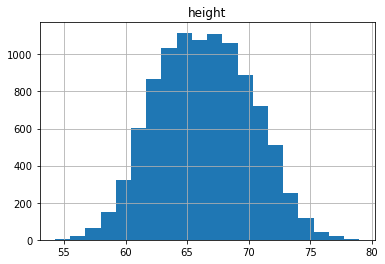

In [4]:
# O dado possui uma distribuição normal.
df_height.hist(bins=20)

In [55]:
# Agora, retiraremos os dados acima e abaixo de três desvios-padrões.
max_height = df_height.height.mean() + (3 * df_height.height.std())
min_height = df_height.height.mean() - (3 * df_height.height.std())

df_height[(df_height['height']>min_height) & (df_height['height']<max_height)].shape

(9993, 3)

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Como possuímos o sexo dos indivíduos, o certo teria sido nós mensurarmos a média e desvio-padrão para as altura de homens e mulheres, separadamente. Mas, em decorrência do caráter meramente acadêmico do vídeo, isso não se concretizou.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Z-Score</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Z-Score é um valor que nos diz por quantos desvios-padrões um dado se encontra acima ou abaixo da média de uma estatística.
            $$Z=\frac{x-µ}{\sigma}$$
        </li>
        <li> 
            Nós o usaremos para realizar a mesma operação feita na última seção.
        </li>
    </ul>
</div>

In [53]:
# O 'scipy.stats' possui um método que pode medir automaticamente o z-score de um array.
from scipy.stats import zscore
df_height['height_zscore'] = zscore(df_height.height)
df_height.head()

,gender,height,height_zscore
0,Male,73.847017,1.944061
1,Male,68.781904,0.627537
2,Male,74.110105,2.012443
3,Male,71.730978,1.394060
4,Male,69.881796,0.913421


In [63]:
# Removendo as linhas com um zscore acima de 3 ou abaixo de -3.
df_height[(df_height.height_zscore>-3) & (df_height.height_zscore<3)]

,gender,height,height_zscore
0,Male,73.847017,1.944061
1,Male,68.781904,0.627537
2,Male,74.110105,2.012443
3,Male,71.730978,1.394060
4,Male,69.881796,0.913421
...,...,...,...
9995,Female,66.172652,-0.050660
9996,Female,67.067155,0.181839
9997,Female,63.867992,-0.649688
9998,Female,69.034243,0.693125


<p style='color:red'> Remover os outliers com o uso de 3 desvios-padrões. (8:00)